# ML/ Image Quality Detector
> part 4
## CNN layer can LEARN image FEATURES

!!! The deeper layer, the HIGHER will be the FEATURES it learns

### Before assemling a complex NN, let's inspect the images we have

we have to choise the correct:

* CNN depth 
    deph = 1
* kernel size 
    min <SIZE=(15x15)<max
* numbers of filters
 min < N (32) < max
* how we transfer the information in the deeper layer
average/mean


                                  image_1_version_1 
                               /
      image_1(500x500) ---> CNN - image_1_version_2
                                  ........
                                \
                                  image_1_version_32

      output_size = input_size - K_size + 1

In [151]:
import os

from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np 

import torch, torch.nn as nn, torch.optim as optim


In [152]:
# Image Helpers 
def loadImages(folder,number=10):
    images = []
    file_names = os.listdir(folder)
    for file_name in file_names:
            img = Image.open(folder+"/"+file_name)
            img = ImageOps.grayscale(img)
            img_matrix= np.array(img)
            images.append(img_matrix)
            print(file_name)
    return images

def imageToTensor(img):
      img_tensor = torch.from_numpy(img).type(torch.FloatTensor).view(1,500,500)
      return img_tensor

In [153]:
# Prep The Model     -->  create multi layer of neurons NN
model = nn.Sequential(
    #                            v--nn.layers      V-- pixels taken
    nn.Conv2d(in_channels=1,out_channels=32,kernel_size=(15,15))
)

In [154]:
# PREPARING DATASET
original_images  = loadImages("images/original")
print("original_images","Done:")
sharpened_images = loadImages("images/sharpened")
print("sharpened_images","Done:")
blurred_images   = loadImages("images/blurred")   
print("blurred_images","Done:")
lowq_images      = loadImages("images/lowq")      
print("lowq_images","Done:")



image_00009.jpg
image_00008.jpg
image_00000.jpg
image_00001.jpg
image_00003.jpg
image_00002.jpg
image_00006.jpg
image_00007.jpg
image_00005.jpg
image_00004.jpg
original_images Done:
image_00009.jpg
image_00008.jpg
image_00000.jpg
image_00001.jpg
image_00003.jpg
image_00002.jpg
image_00006.jpg
image_00007.jpg
image_00005.jpg
image_00004.jpg
sharpened_images Done:
image_00009.jpg
image_00008.jpg
image_00000.jpg
image_00001.jpg
image_00003.jpg
image_00002.jpg
image_00006.jpg
image_00007.jpg
image_00005.jpg
image_00004.jpg
blurred_images Done:
image_00009.jpg
image_00008.jpg
image_00000.jpg
image_00001.jpg
image_00003.jpg
image_00002.jpg
image_00006.jpg
image_00007.jpg
image_00005.jpg
image_00004.jpg
lowq_images Done:


torch.Size([32, 486, 486])


/var/folders/l3/v2p7770500x6xctv4wklq2y80000gn/T/ipykernel_76227/2114497731.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


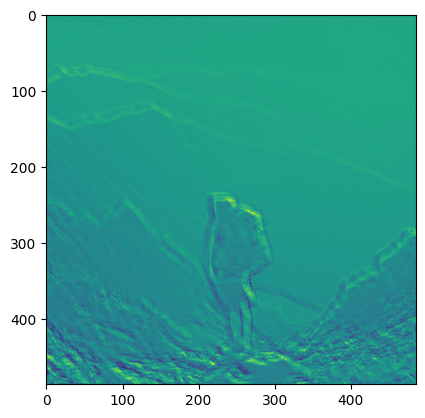

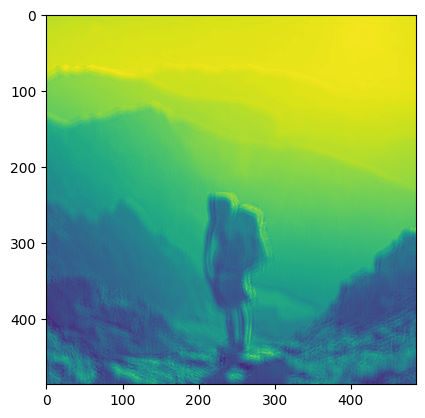

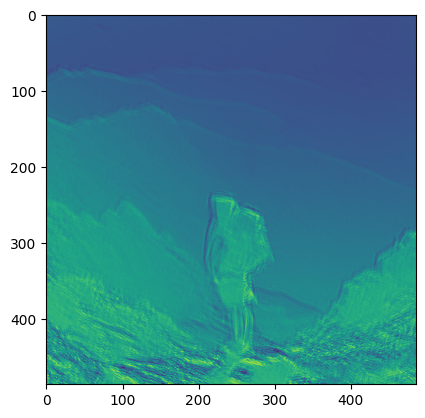

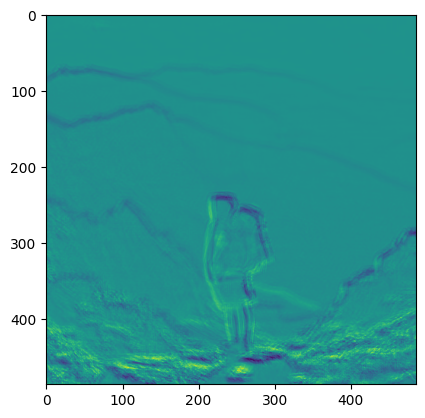

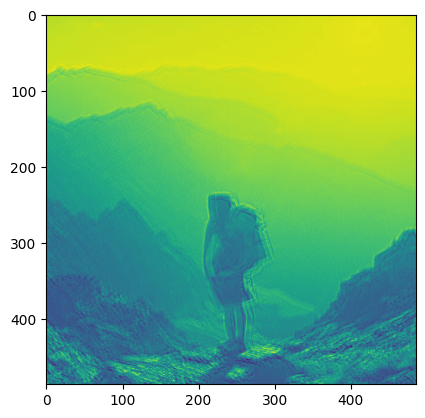

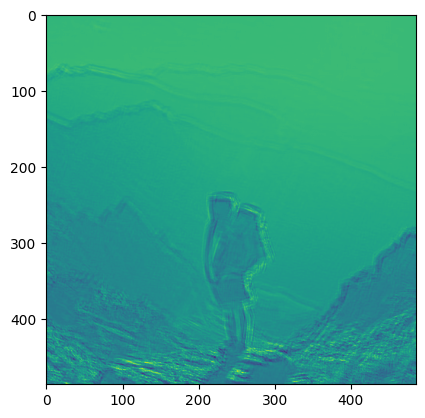

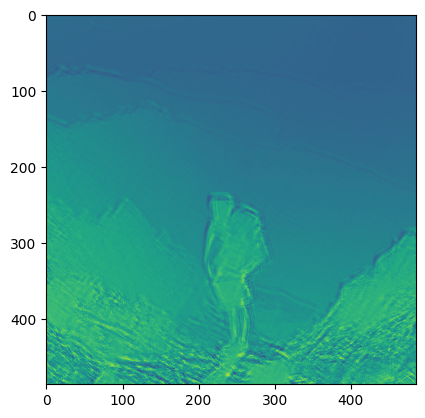

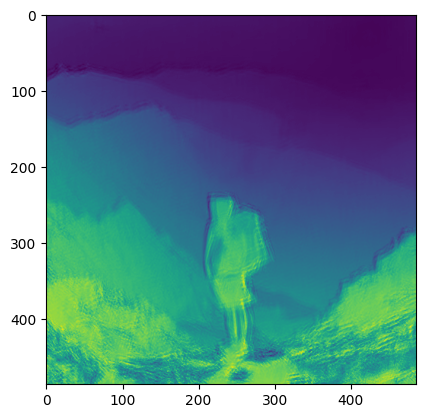

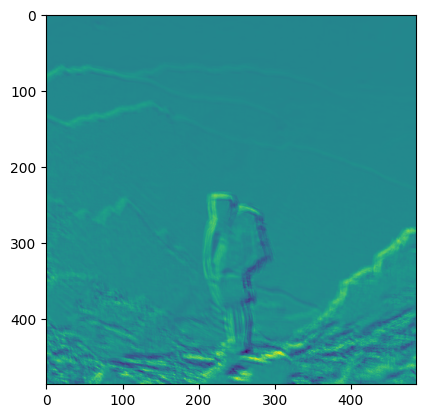

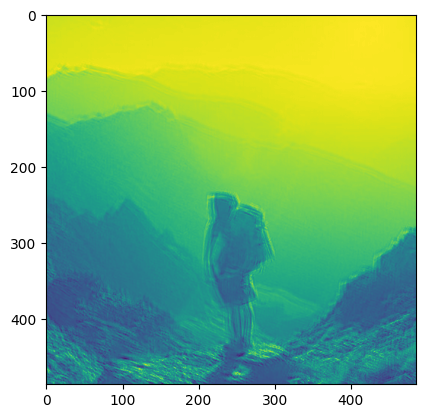

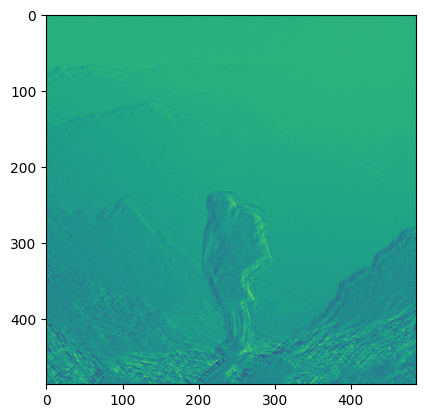

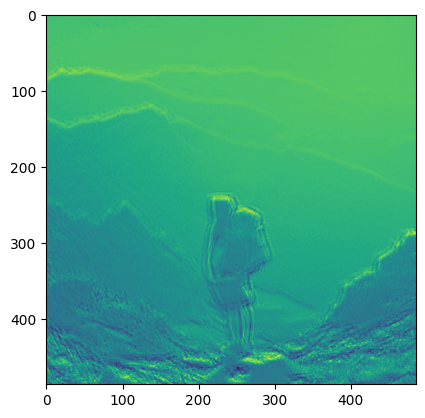

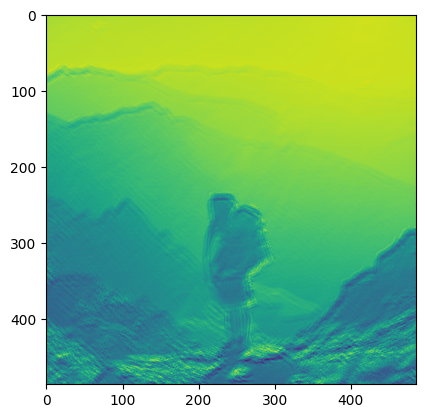

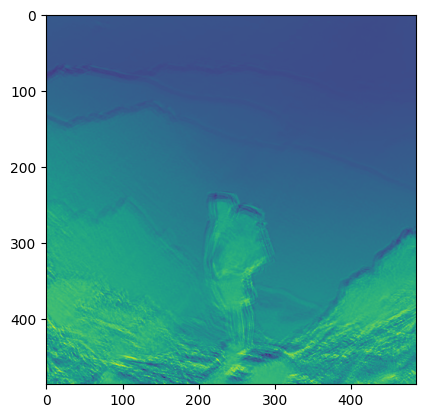

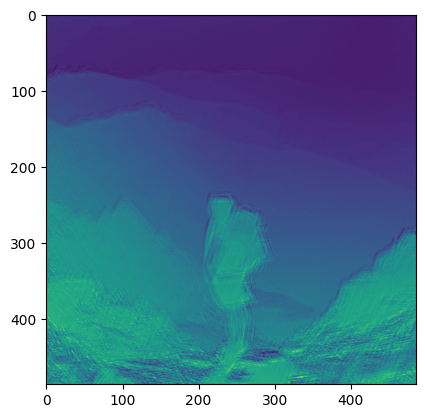

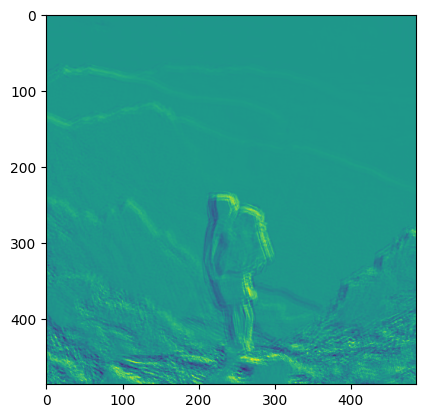

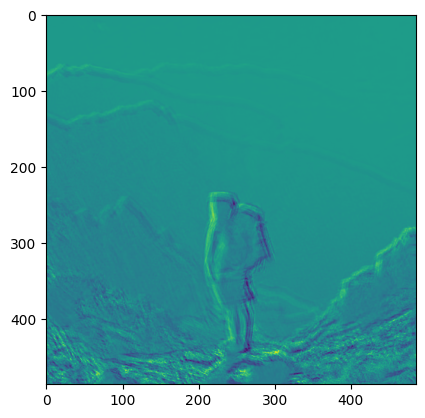

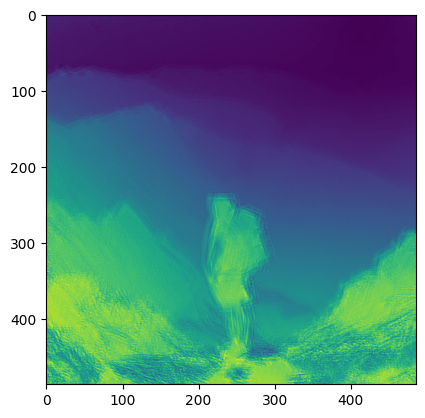

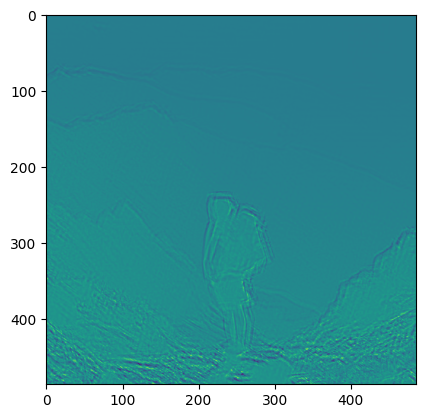

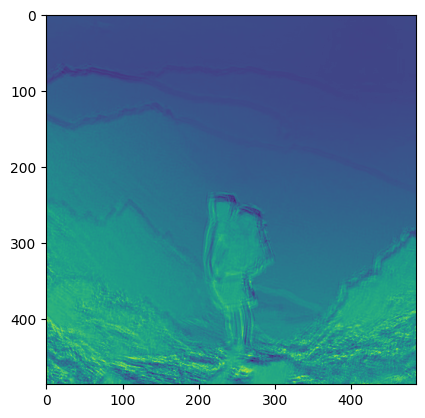

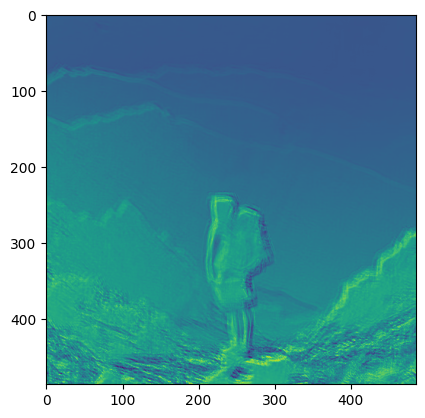

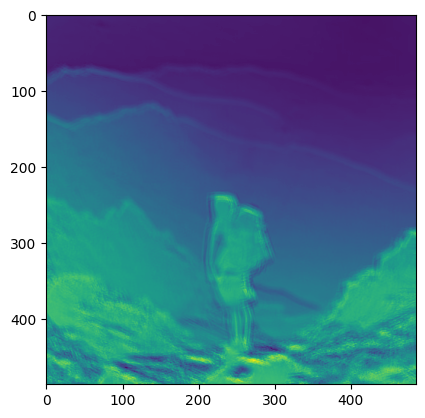

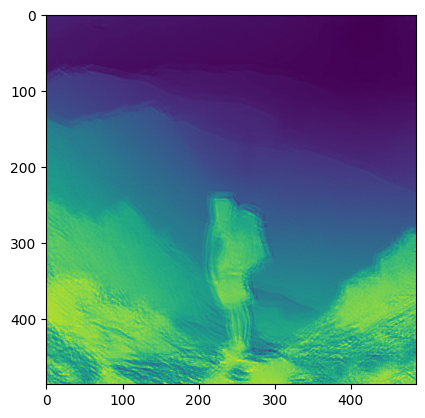

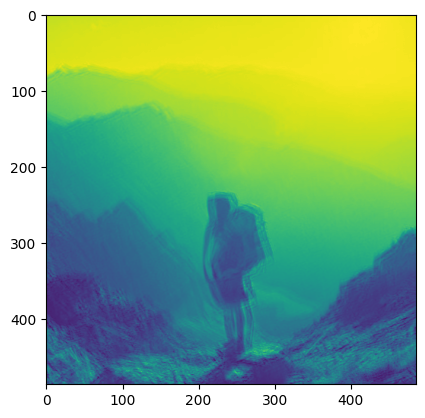

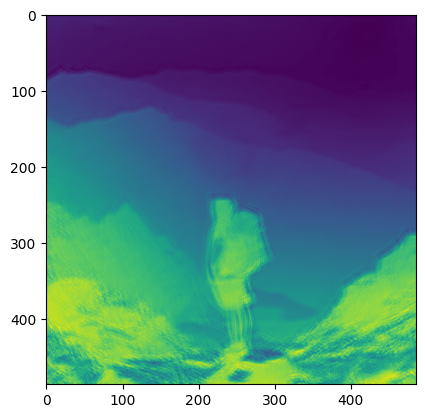

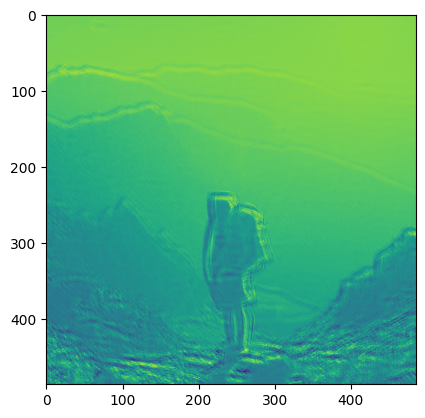

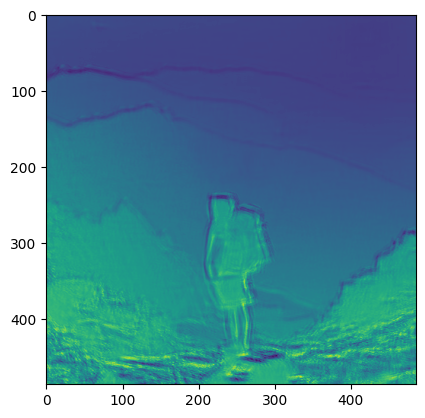

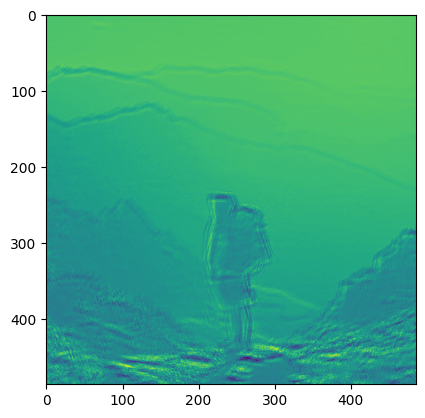

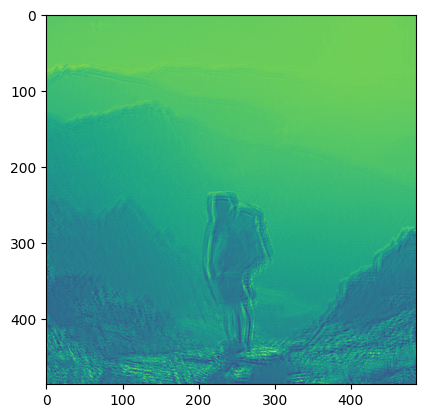

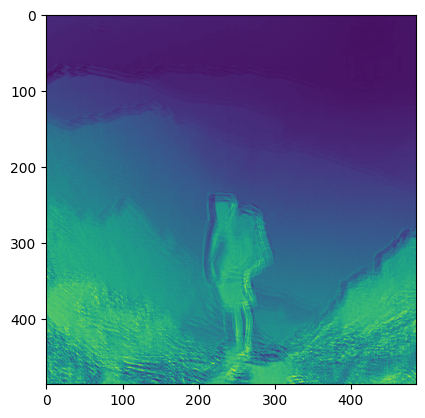

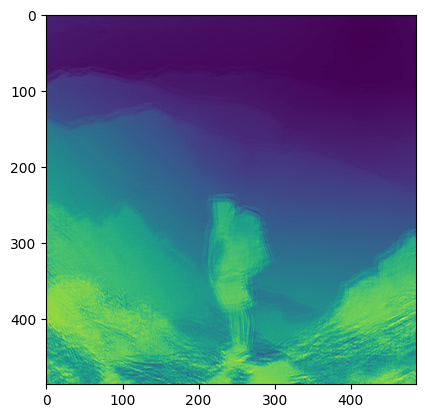

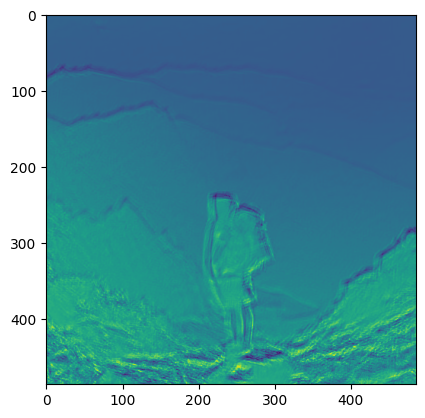

In [155]:
# pass one image trough the CNN
img_tensor = imageToTensor(original_images[7])
otuput= model(img_tensor)

print(otuput.shape)
for img in otuput:
    plt.figure()
    plt.imshow(img.detach())